### Estudo de caso: Previsão de preço de casas

**Descrição do problema**:
 > Busca-se encontrar um padrão nas residências que esteja associado ao valor monetário das mesmas. Este padrão pode estar associado à região onde o imóvel se encontra, número de cômodos, proximidade com a estrada principal, entre outros. 

#### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

#### Dicionário de dados

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Leitura de dados

In [2]:
df = pd.read_csv('datasets/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Análise Exploratória

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


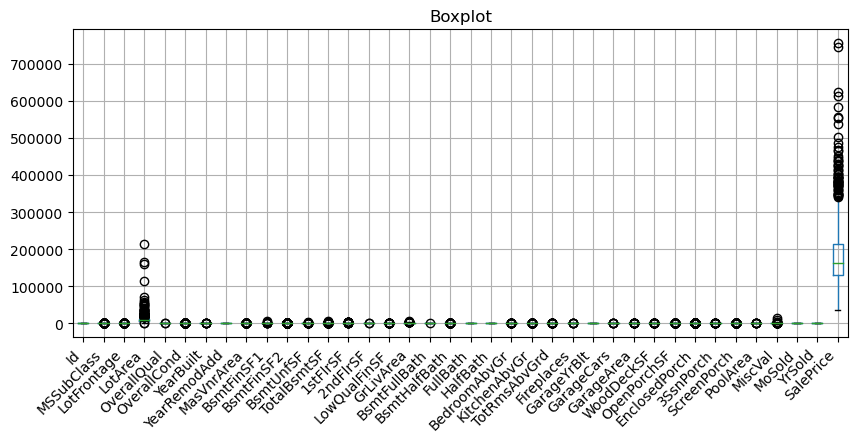

In [8]:
df.boxplot(figsize=(10, 4));
plt.title('Boxplot')
plt.xticks(rotation=45, ha='right');

#### Nulos

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
nulos_percentile = df.isnull().mean()
nulos_percentile

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [13]:
nulos_percentile[nulos_percentile>0.7]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

### Distribuição dos dados

<Axes: xlabel='SalePrice', ylabel='Count'>

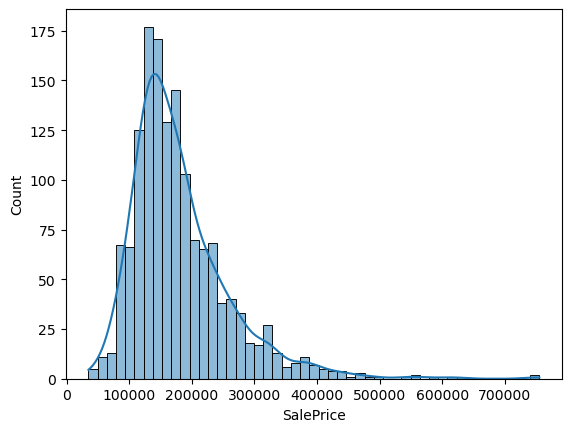

In [14]:
sns.histplot(data=df, x='SalePrice', kde=True )

In [15]:
df['SalePrice'].skew()

1.8828757597682129

In [16]:
df['Log_Price'] = np.log10(df['SalePrice'])
df[['Log_Price','SalePrice']]

,Log_Price,SalePrice
0,5.319106,208500
1,5.258877,181500
2,5.349278,223500
3,5.146128,140000
4,5.397940,250000
...,...,...
1455,5.243038,175000
1456,5.322219,210000
1457,5.425697,266500
1458,5.152670,142125


<Axes: xlabel='Log_Price', ylabel='Count'>

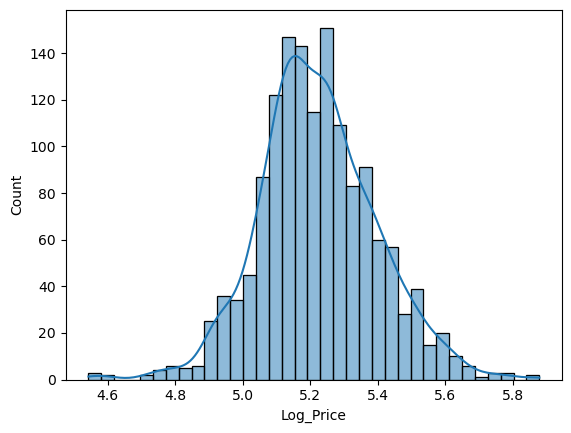

In [17]:
sns.histplot(data=df, x='Log_Price', kde=True )

### Correlação

In [18]:
correlacao = df.corr(method='spearman', numeric_only=True)
correlacao

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Log_Price
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871,0.301871


<Axes: >

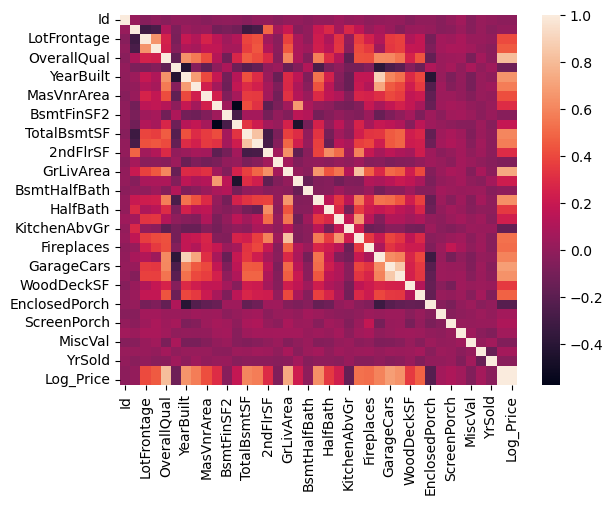

In [22]:
sns.heatmap(correlacao)

In [25]:
corr_abs = correlacao['SalePrice'].abs().sort_values(ascending=False)
corr_abs

Log_Price        1.000000
SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
EnclosedPorch    0.218394
BsmtUnfSF        0.185197
KitchenAbvGr     0.164826
OverallCond      0.129325
ScreenPorch      0.100070
MoSold           0.069432
LowQualFinSF     0.067719
3SsnPorch        0.065440
MiscVal          0.062727
PoolArea         0.058453
BsmtFinSF2       0.038806
YrSold           0.029899
Id               0.018546
BsmtHalfBath     0.012189
MSSubClass  

In [26]:
corr_abs[corr_abs>0.5]

Log_Price       1.000000
SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
Name: SalePrice, dtype: float64

### Outliers

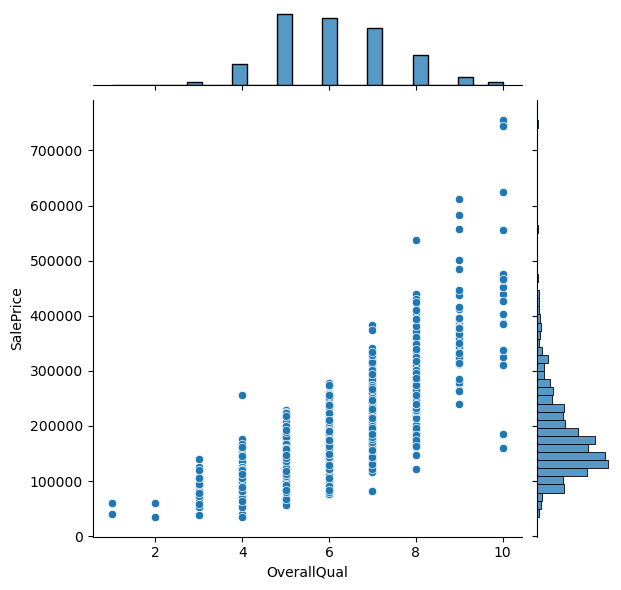

In [27]:
sns.jointplot(data=df, x='OverallQual', y='SalePrice')

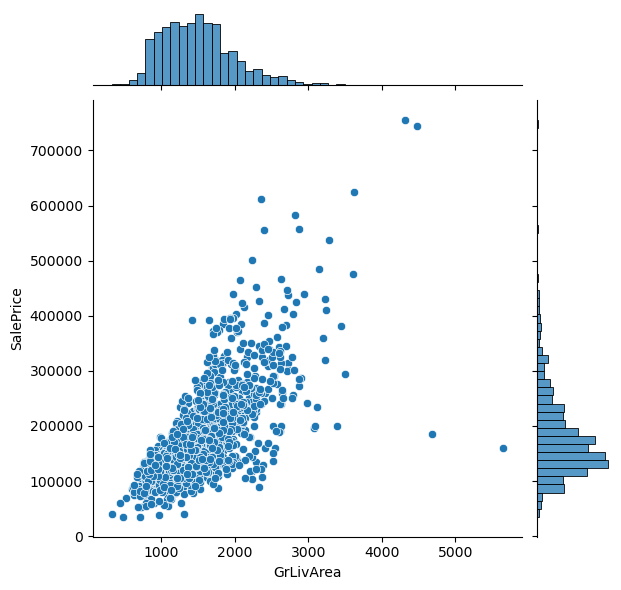

In [28]:
sns.jointplot(data=df, x='GrLivArea', y='SalePrice')

In [29]:
df_outliers = df[df['GrLivArea']>4000]
df = df[df['GrLivArea']<4000]

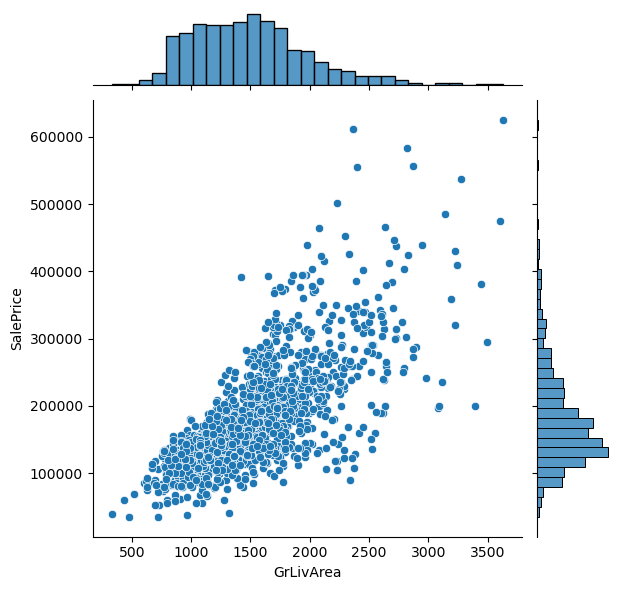

In [30]:
sns.jointplot(data=df, x='GrLivArea', y='SalePrice')

In [33]:
df['GrLivArea'].quantile([0.25, 0.5, 0.75], interpolation='midpoint')

0.25    1128.0
0.50    1458.5
0.75    1775.5
Name: GrLivArea, dtype: float64

### Modelo de regressão linear


$$ \hat{y} = b_0 + b_1 X $$



O modelo possui dois parâmetros:
 - b<sub>0</sub>: chamado de intercepto ou coeficiente linear
 - b<sub>1</sub>: chamado de coeficiente angular

**Objetivo >** Ajustar os coeficientes modelo linear de forma que se obtenha o menor erro possível no modelo. 

### O algoritmo de aprendizagem da regressão linear

A equação acima exprime a **forma funcional** do conjunto de hipóteses (`espaço de busca`) com o qual trabalharemos: funções lineares de uma úniva variável. Isto é,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Ou seja,

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

é o conjunto de hipóteses que está sendo considerado, e o vetor de parâmetros é:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$


### ` Conceito de machine learning:`
**''Capacidade de uma máquina de melhorar seu desempenho em uma tarefa específica por meio da experiência.''**

 - "Melhorar seu desempenho" → Otimizar uma métrica (Função de perda) 
 - "Experiência" → Treinamento (Ajuste de parâmetros)
 
 A partir destes inputs, o algoritmo constrói uma **função de perda**, que nada mais é que uma função que contabiliza **os erros cometidos pelo modelo**.

E para sabermos o quanto um modelo está errando é muito simples: basta **compararmos o target predito $\hat{y}$ com o target real $y$**!

Isso pode ser feito de muitas maneiras. A "maneira" específica é o que determina a relação funcional da função de custo de interesse. Para regressão linear, a função de perda mais comum é o **erro quadrático (squared error)**:

$$\text{SE}= (y_i-\hat{y}_i)^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


#### Visualização de um modelo linear

<img src=https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png width=400>

#### Visualização do aprendizado
Exemplo

<img src='https://miro.medium.com/v2/resize:fit:720/1*CjTBNFUEI_IokEOXJ00zKw.gif'>

Assim, podemos resumir o objetivo do algoritmo de aprendizagem como:

> Determinar o vetor de parâmetros que minimiza a função de custo nos dados de treino


#### Features

In [34]:
X = df[['GrLivArea']]
y = df['SalePrice']

#### Divisão de treino e teste

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modelo

In [36]:
model = LinearRegression()

#### Treinamento do modelo

In [37]:
model.fit(X_train, y_train)

LinearRegression()

#### Variáveis do modelo

In [38]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['GrLivArea'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([117.81350329]),
 'rank_': 1,
 'singular_': array([15606.75525394]),
 'intercept_': 4815.99604057637}

In [39]:
print(f'Coeficiente linear: {model.intercept_}')

Coeficiente linear: 4815.99604057637


In [40]:
print(f'Coeficiente angular: {model.coef_[0]}')

Coeficiente angular: 117.81350329008205


#### Interpretação do resultado

O nosso modelo final é dado por:

$$ \hat{y} = f_{H, \hat{\vec{b}}}(x) =  4815.99 + 117.81 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 117.81 .<br>
> O preço mínimo a ser pago, independente da área construída, é de USD 4815.99!

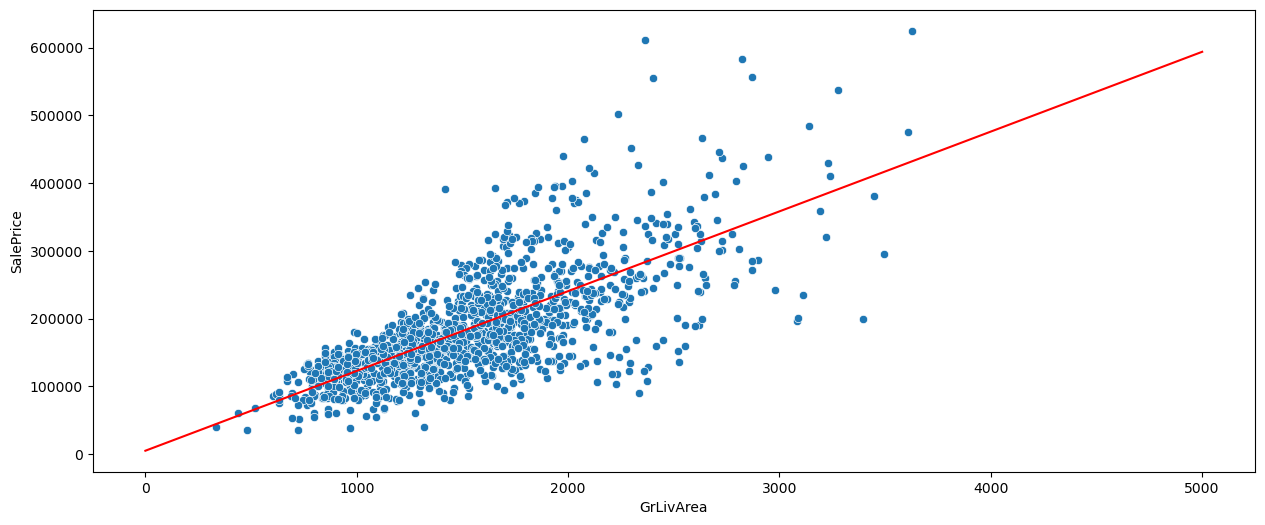

In [42]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
x = np.linspace(0, 5000, 10000)
y = model.intercept_ + model.coef_[0]*x
plt.plot(x, y, color='red')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

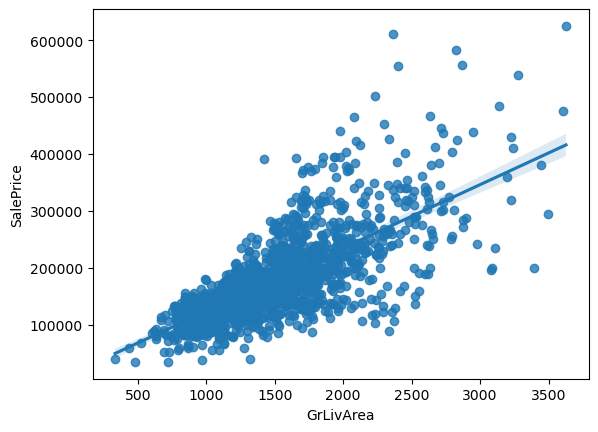

In [44]:
sns.regplot(data=df, x='GrLivArea', y='SalePrice')

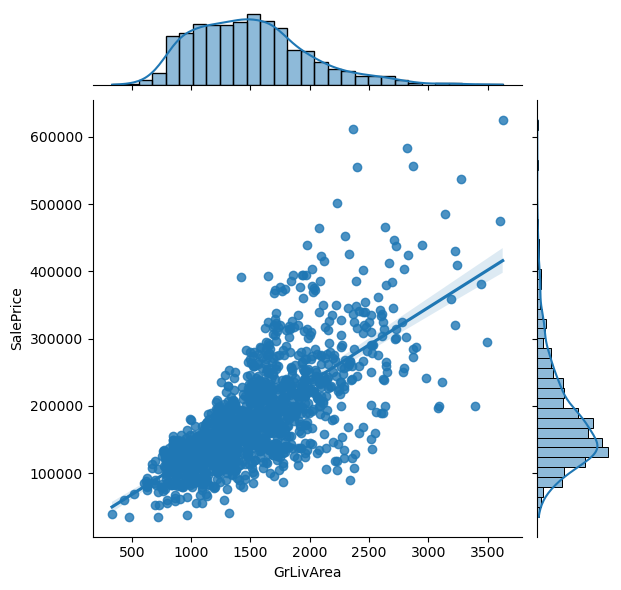

In [45]:
sns.jointplot(data=df, x='GrLivArea', y='SalePrice', kind='reg')

#### Predição

In [46]:
x = float(input('Digite um valor:'))
y = model.intercept_ + model.coef_[0]*x
print(y)

Digite um valor:3500
417163.2575558635


In [47]:
y_pred = model.predict([[x]])
y_pred

C:\Users\ProDigital\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([417163.25755586])

In [48]:
y_pred = model.predict(X_test)
y_pred

array([219236.57202853, 162332.64993942, 129227.0555149 , 213463.71036731,
       104368.4063207 ,  79038.50311333, 235023.5814694 , 148666.28355777,
       164099.85248877, 168930.20612366, 116738.82416615, 381112.3255491 ,
       162450.46344271, 185659.72359085, 127813.29347542, 117210.07817931,
       207455.22169952, 208986.79724229, 215466.53992324, 179062.16740661,
        79038.50311333, 185424.09658427, 143835.92992287, 127342.03946226,
       173407.11924868, 146074.38648538, 125928.27742278, 106606.86288321,
       151611.62114002, 168812.39262037, 152318.50215976, 191196.95824549,
       124396.70188001, 116974.45117273, 110141.26798191, 221475.02859104,
       201328.91952843, 132761.46061361, 222770.97712723, 108727.50594243,
       143364.67590971, 253402.48798265, 161979.20942955, 149019.72406764,
       245862.42377208, 216526.86145285, 182596.57250531, 117327.8916826 ,
       173407.11924868, 145720.94597551, 247276.18581157, 152318.50215976,
       179651.23492306, 1

#### Avaliação

In [ ]:
mean_absolute_error, mean_squared_error, r2_score

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

37686.6884709122

In [50]:
mse = mean_squared_error(y_test, y_pred)
mse

2685322385.3897514

In [51]:
r2 = r2_score(y_test, y_pred)
r2

0.4649050820542755

O caso 100% ideal seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas temos que tomar muito cuidado com a forma como interpretaremos esta métrica! Discutiremos mais a diante a importância de calcularmos as métricas de avaliação também na base de treino.


### Teste de normalidade

### Regressão Linear Múltipla

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que é expressa pela seguinte função de hipótese:

$$ \hat{y} = f_{H, \vec{b}} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos! Ou seja, o vetor de parâmetros tem $n+1$ dimensões:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1\\
\vdots\\
b_n
\end{bmatrix}$$

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

#### Features

In [52]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.319106
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5.258877
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,5.349278
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,5.146128
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,5.243038
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,5.322219
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,5.425697
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,5.152670


In [53]:
df = df.select_dtypes(include=[np.number])
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Log_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,5.319106
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,5.258877
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,5.349278
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,5.146128
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,5.243038
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,5.322219
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,5.425697
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,5.152670


In [55]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
Log_Price          0
dtype: int64

In [56]:
df.dropna(axis='columns', inplace=True)

In [58]:
df.drop(columns=['Id', 'Log_Price'], inplace=True)
df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [59]:
df[df.columns[:-1]]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [60]:
X = df[df.columns[:-1]]
y = df['SalePrice']

#### Divisão de treino e teste 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Modelo linear múltiplo

In [62]:
model = LinearRegression()

#### Treinamento

In [63]:
model.fit(X_train, y_train)

LinearRegression()

#### Predição

In [64]:
vars(model)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'], dtype=object),
 'n_features_in_': 33,
 'coef_': array([-1.23668204e+02,  5.00334121e-01,  1.56636674e+04,  4.11475041e+03,
         3.48458099e+02,  1.47967505e+02,  2.46122989e+01, -2.13795802e-01,
        -1.91237993e+00,  2.24861232e+01,  2.58833103e+01,  2.37741064e+01,
        -1.74955155e+01,  3.21619013e+01, -2.55507352e+02, -4.69061666e+03,
        -1.58189619e+03,  7.0

#### Avaliação dos resultados

In [65]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8435276722504529

### Regressão logistica

<img src="https://www.saedsayad.com/images/LogReg_1.png">

#### Referência

- [Algoritmo de descida de gradiente](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)